In [6]:
import os
import json
import re
import glob
from collections import defaultdict

import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

In [19]:
results_json = json.load(open('/home/Nele/code/ct_classifier_zoops/runs/Jan19_21-30-00_cv4e-2026-student4/val_predictions/val_predictions_epoch_00200.json'))
results_json.keys()
gt = results_json['labels']
predictions = results_json['predictions']
confidences = results_json['confidences']
labels = np.unique(gt)
labels.sort()
precision = precision_score(gt, predictions, labels=labels, average=None, zero_division=0)
recall = recall_score(gt, predictions, labels=labels, average=None, zero_division=0)


In [18]:
results_json['confidences']

[0.6387022733688354,
 0.7913669347763062,
 0.5888261795043945,
 0.9028782248497009,
 0.9414663314819336,
 0.6766533255577087,
 0.5693787336349487,
 0.6622037291526794,
 0.6463916897773743,
 0.9598798751831055,
 0.831013023853302,
 0.9322162866592407,
 0.9714595079421997,
 0.7033407688140869,
 0.7054053544998169,
 0.9567195773124695,
 0.6422160863876343,
 0.5104235410690308,
 0.5399165749549866,
 0.8286013007164001,
 0.36290156841278076,
 0.5607774257659912,
 0.6809594035148621,
 0.9145190715789795,
 0.5598971247673035,
 0.43751266598701477,
 0.7139524221420288,
 0.8260723948478699,
 0.6603512167930603,
 0.8935962319374084,
 0.9986059069633484,
 0.9999674558639526,
 0.9960252046585083,
 0.8175209164619446,
 0.670246958732605,
 0.9073479771614075,
 0.5899625420570374,
 0.7271379828453064,
 0.4497121274471283,
 0.9971700310707092,
 0.9912585616111755,
 0.9670671224594116,
 0.9839351773262024,
 0.9997432827949524,
 0.9718656539916992,
 0.9469454288482666,
 0.6496334075927734,
 0.8540428876

Text(0.5, 0, 'class label')

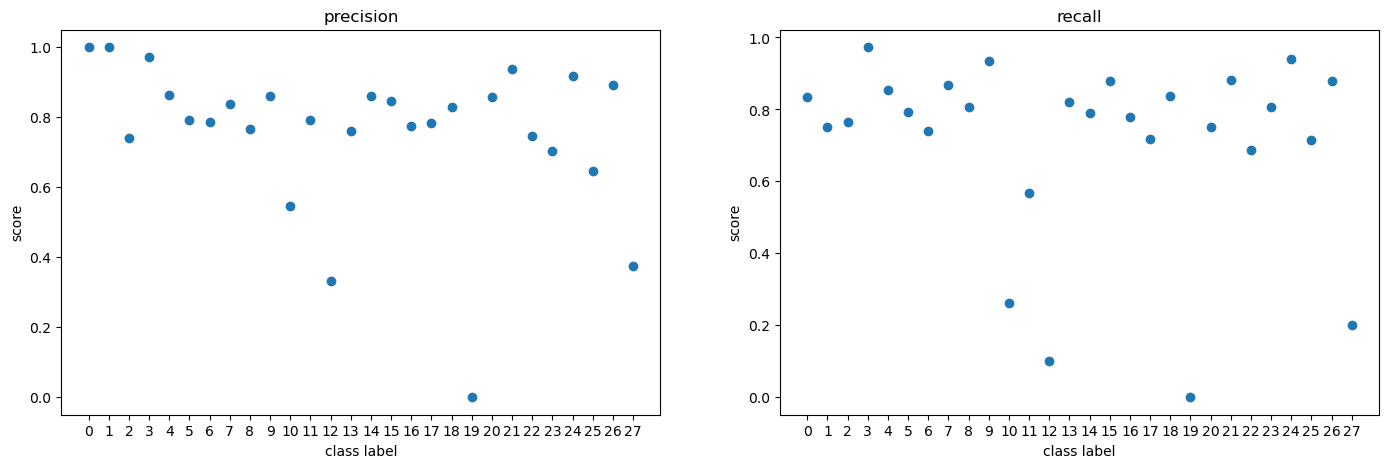

In [10]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1) 
plt.scatter(labels,precision,label='precision')
plt.xticks(labels)
plt.title('precision')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter(labels,recall,label='recall')
plt.xticks(labels)
plt.title('recall')
plt.ylabel('score')
plt.xlabel('class label')

Text(0.5, 0, 'class label')

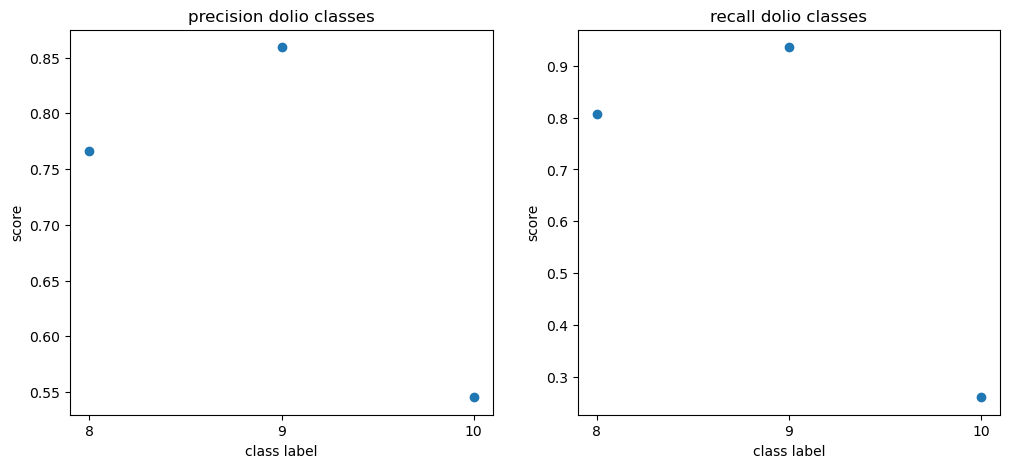

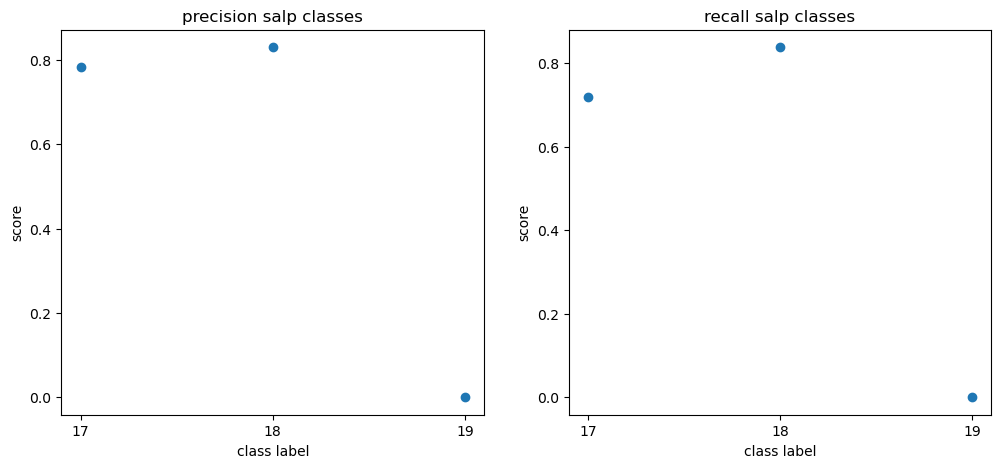

In [14]:
# # look at classes 
#     "dolio": 8,
#     "dolnurse": 9,
#     "dolphor": 10,
# separately

plt.figure(figsize=(12,5))
plt.subplot(1,2,1) 
plt.scatter([8,9,10],precision[[8,9,10]],label='precision')
plt.xticks([8,9,10])
plt.title('precision dolio classes')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter([8,9,10],recall[[8,9,10]],label='recall')
plt.xticks([8,9,10])
plt.title('recall dolio classes')
plt.ylabel('score')
plt.xlabel('class label')

# # look at classes 
#     "salp": 17,
#     "salpchain": 18,
#     "salpring": 19,
# separately

plt.figure(figsize=(12,5))
plt.subplot(1,2,1) 
plt.scatter([17,18,19],precision[[17,18,19]],label='precision')
plt.xticks([17,18,19])
plt.title('precision salp classes')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter([17,18,19],recall[[17,18,19]],label='recall')
plt.xticks([17,18,19])
plt.title('recall salp classes')
plt.ylabel('score')
plt.xlabel('class label')
    

In [16]:
translate_labels = {8:28, 9:28,10:28, 17:29, 18:29, 19:29}
gt_translated = np.array([translate_labels[label] if label in translate_labels.keys() else label for label in gt])
pred_translated = np.array([translate_labels[label] if label in translate_labels.keys() else label for label in predictions])
labels_translated = np.unique(gt_translated)
labels_translated.sort()
precision = precision_score(gt_translated, pred_translated, labels=labels_translated, average=None, zero_division=0)
recall = recall_score(gt_translated, pred_translated, labels=labels_translated, average=None, zero_division=0)

In [15]:
np.unique(np.array(gt)),np.unique(np.array(gt_translated))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 16, 20, 21, 22,
        23, 24, 25, 26, 27, 28, 29]))

Text(0.5, 0, 'class label')

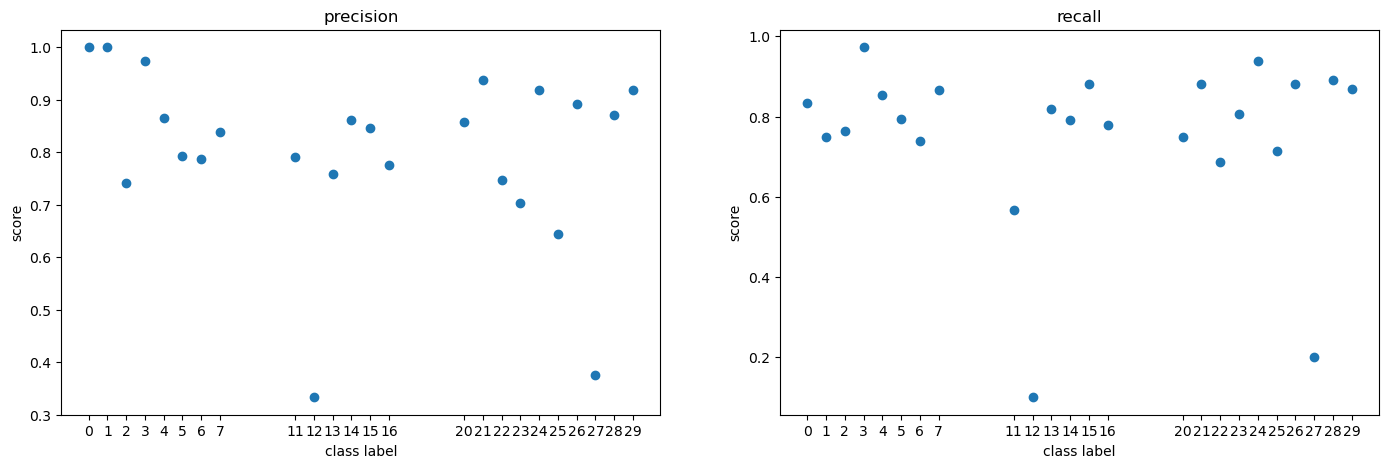

In [17]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1) 
plt.scatter(labels_translated,precision,label='precision')
plt.xticks(labels_translated)
plt.title('precision')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter(labels_translated,recall,label='recall')
plt.xticks(labels_translated)
plt.title('recall')
plt.ylabel('score')
plt.xlabel('class label')

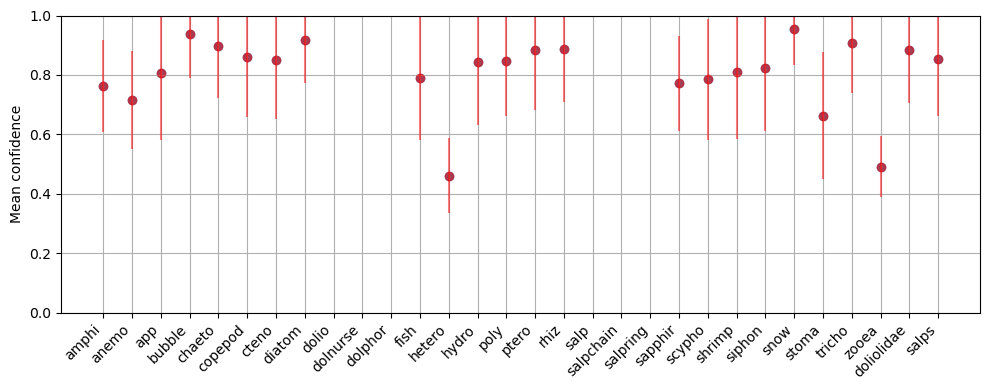

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Mean confidence for each true class
conf_arr = np.array(confidences)
pred = np.array(pred_translated)
category_dict = json.load(open("/home/Nele/code/scripts/DataPrep_Classifier/category_dict.json", 'r'))
inverse_category_dict = {v: k for k, v in category_dict.items()}
inverse_category_dict[28] = "doliolidae"
inverse_category_dict[29] = "salps"
class_ids = sorted(inverse_category_dict.keys())
class_names = [inverse_category_dict[c] for c in class_ids]
mean_conf_true = [conf_arr[pred == c].mean() if (pred == c).any() else np.nan for c in class_ids]
std_conf_true = [conf_arr[pred == c].std() if (pred == c).any() else np.nan for c in class_ids]

plt.figure(figsize=(10, 4))
plt.scatter(class_ids, mean_conf_true, color="steelblue")
plt.errorbar(class_names, mean_conf_true, yerr=std_conf_true, fmt="o", color="red", alpha=0.5)
#plt.title(f"Mean confidence by class ep:{ep_num_str}")
plt.ylabel("Mean confidence")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.grid(axis="x")
plt.tight_layout()
plt.show()